# CODING

## Table of Content
1. Setup
2. Data Summary
2.1 First and last rows
2.2 Data Type, Size, Missing Values and Duplicates
3. Feature Analysis
4. Change of feature representation
5. Processing missing values
6. Influence of factors on Survival

## 1. Setup

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Settings
sns.set_style('whitegrid')
# Make static images plots embedded in the notebook
%matplotlib inline

In [3]:
# Get the Data and create the data frame
path = './Data/'
filename = 'titanic-data.csv'
titanic = pd.read_csv(path+filename)

## 2. Data Summary

### 2.1 first rows and last rows

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We notice that:
- Passenger Id: is an identifier redundant with the line number
In some cases:
- the age feature is empty
- the cabine feature is empty

In [6]:
# Summary of numerical data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Data type, size, missing and duplicated values

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# size of the data frame
titanic.shape

(891, 12)

In [9]:
# culumn names
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

What is the distribution of categorical features?
Names are unique across the dataset (count=unique=891)
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
Embarked takes three possible values. S port used by most passengers (top=S)
Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [10]:
# NaN values in data frame: High number
print "Percentage of NaN values for Cabin feature: " + repr(titanic.Cabin.isnull().sum()*100.0/891)
print "Percentage of NaN values for Age feature: " +repr(titanic.Age.isnull().sum()*100.0/891)
print "Percentage of NaN values for Embarked feature: " + repr(titanic.Embarked.isnull().sum()*100.0/891)

Percentage of NaN values for Cabin feature: 77.104377104377107
Percentage of NaN values for Age feature: 19.865319865319865
Percentage of NaN values for Embarked feature: 0.22446689113355781


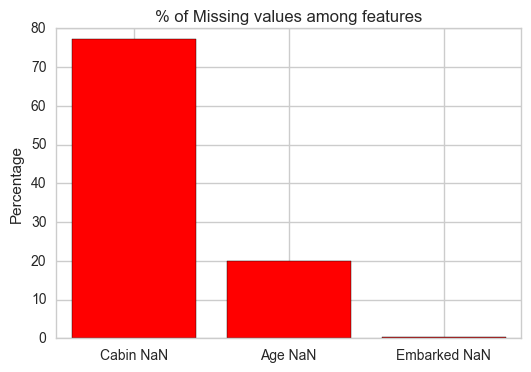

In [11]:
#plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features = ('Cabin NaN', 'Age NaN', 'Embarked NaN')
x_pos = np.arange(len(features))
Cabin_NaN = titanic.Cabin.isnull().sum()*100.0/891
Age_NaN = titanic.Age.isnull().sum()*100.0/891
Embarked_NaN = titanic.Embarked.isnull().sum()*100.0/891
vals = (Cabin_NaN,Age_NaN,Embarked_NaN)

ax.bar(x_pos, vals, align='center',
        color='red', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylabel('Percentage')
ax.set_title('% of Missing values among features')

plt.show()
plt.savefig('MissingDataAmongFeatures.png')

In [12]:
# Is there any missing and duplicate value for Name feature 
print "# unique values: ",len(titanic['Name'].unique())
print "# null values:",titanic['Name'].isnull().sum()

# unique values:  891
# null values: 0


In [13]:
# Is there any missing and duplicate value for Ticket feature 
print "# uniquevalues: ",len(titanic['Ticket'].unique())
print "# null values:",titanic['Ticket'].isnull().sum()
print "# duplicates: ", len(titanic.set_index('Ticket').index.get_duplicates())

# uniquevalues:  681
# null values: 0
# duplicates:  134


In [14]:
print "duplicates are:"
titanic.set_index('Ticket').index.get_duplicates()

duplicates are:


['110152',
 '110413',
 '110465',
 '111361',
 '113505',
 '113572',
 '113760',
 '113776',
 '113781',
 '113789',
 '113798',
 '113803',
 '113806',
 '11668',
 '11751',
 '11767',
 '11967',
 '12749',
 '13502',
 '13507',
 '1601',
 '16966',
 '17421',
 '17453',
 '17474',
 '19877',
 '19928',
 '19943',
 '19950',
 '19996',
 '220845',
 '230080',
 '230136',
 '230433',
 '231919',
 '237736',
 '239853',
 '239865',
 '24160',
 '243847',
 '244252',
 '244367',
 '248727',
 '248738',
 '250644',
 '250647',
 '250649',
 '250655',
 '2627',
 '26360',
 '2651',
 '2653',
 '2659',
 '2661',
 '2665',
 '2666',
 '2668',
 '2678',
 '2691',
 '2699',
 '28403',
 '2908',
 '29106',
 '29750',
 '3101278',
 '3101295',
 '31027',
 '345764',
 '345773',
 '347054',
 '347077',
 '347080',
 '347082',
 '347088',
 '347742',
 '349237',
 '349909',
 '35273',
 '35281',
 '358585',
 '363291',
 '364516',
 '364849',
 '367226',
 '367230',
 '36928',
 '36947',
 '36973',
 '370129',
 '370365',
 '371110',
 '376564',
 '382652',
 '392096',
 '4133',
 '54636'

In [15]:
## Is there any missing and duplicate value for Cabin feature 
#len(titanic['Cabin'].unique())
print "# of unique values: ",len(titanic['Cabin'].unique())
print "# nb of null values:",titanic['Cabin'].isnull().sum()
# how to deal
# option 1: set to zero/default -> no since very few unique values
# option 2: mean : does not make sense since it is an ordinal feature
# option 3: ignore in computation: YES
print "# nb of duplicates: ", len(titanic.set_index('Cabin').index.get_duplicates())

# of unique values:  148
# nb of null values: 687
# nb of duplicates:  47


In [16]:
print "duplicates are:"
titanic.set_index('Cabin').index.get_duplicates()

duplicates are:


[nan,
 'B18',
 'B20',
 'B22',
 'B28',
 'B35',
 'B49',
 'B5',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B77',
 'B96 B98',
 'C123',
 'C124',
 'C125',
 'C126',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C52',
 'C65',
 'C68',
 'C78',
 'C83',
 'C92',
 'C93',
 'D',
 'D17',
 'D20',
 'D26',
 'D33',
 'D35',
 'D36',
 'E101',
 'E121',
 'E24',
 'E25',
 'E33',
 'E44',
 'E67',
 'E8',
 'F G73',
 'F2',
 'F33',
 'F4',
 'G6']

In [17]:
# Is there any missing and duplicate value for Embarked feature 
print "# unique values: ",len(titanic['Embarked'].unique())
print "# null values:",titanic['Embarked'].isnull().sum()
# how to deal:
# option 1: set to most frequent -> YES
# option 2: discard value or observation
print "# duplicates: ", len(titanic.set_index('Embarked').index.get_duplicates())
print "duplicates are:"
titanic.set_index('Embarked').index.get_duplicates()

# unique values:  4
# null values: 2
# duplicates:  4
duplicates are:


[nan, 'C', 'Q', 'S']

In [18]:
# Analysis with Group by Embarked
grouped_data = titanic.groupby('Embarked')
# where most people embarked?
print grouped_data.count()['Name']
# conclusion:  at Southampton
# which are the two empty values
print titanic[titanic.Embarked.isnull()]
# Processing missing values: replace with the most frequent value
titanic.loc[829,'Embarked'] = 'S'
titanic.loc[61,'Embarked'] = 'S'
print titanic.loc[829]
print titanic.loc[61]

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  
PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                   62
SibSp                                                  0
Parch                                                  0
Ticket                                            

In [19]:
# Analysis with Group by Sex, 
grouped_data = titanic.groupby('Embarked')
# where most people embarked?
print grouped_data.count()['Name']

Embarked
C    168
Q     77
S    646
Name: Name, dtype: int64


In [20]:
# Is there any missing value for Age feature?
# how to deal: 
# option 1: set to zero -> NO
# option 2: set mean 
# from the overall population -> NO
# from groups: embarked, sex, parch, SibSp, Survived -> YES
# option 3: discard values or observation -> NO
# this feature is continuous: no need to look for unique values and duplicates
print "# null values:",titanic['Age'].isnull().sum()

# null values: 177


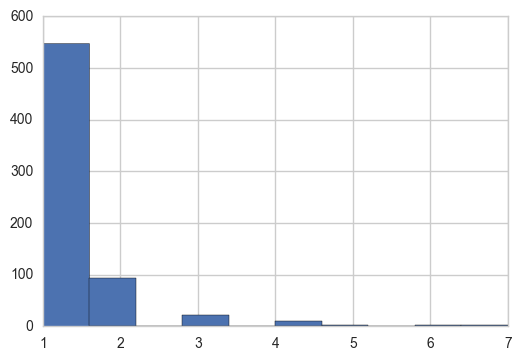

In [21]:
titanic.Ticket.value_counts().hist()

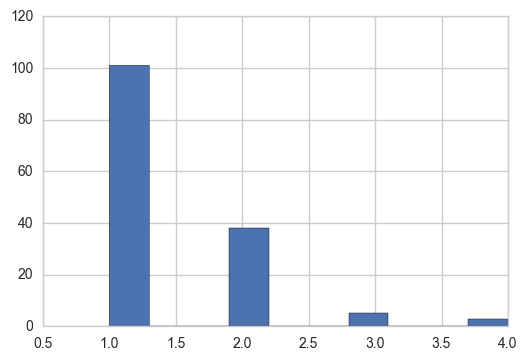

In [22]:
titanic.Cabin.value_counts().hist()

## 3. Feature Analysis
Number of passengers: 891

We have 12 features which are either continuous or categorical. 

The dependant feature is 'Survived' and the rest are independant variables.

Categorical features could be split into two sub-types: 

ordinal feature or nominal.

<b>Continuous features are:</b>
 
'Age'

'Fare'

<b>Categorical feature:</b>

'PassengerId', Ordinal feature

'Pclass', Ordinal feature

'SibSp', Ordinal feature

'Parch', Ordinal feature

'Name', Nominal feature (Textual feature)

'Sex', Nominal feature

'Ticket', Nominal feature (Textual feature)

'Cabin', Nominal

'Embarked', Nominal

(array([ 216.,    0.,    0.,    0.,    0.,  184.,    0.,    0.,    0.,  491.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

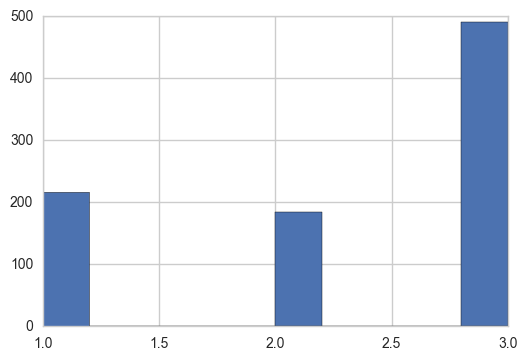

In [23]:
# What class is the most common
plt.hist(titanic.Pclass)

## 4. Change feature representation

In [24]:
# Create new feature: Title
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print big_string
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

titanic['Title']=titanic['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
titanic['Title']=titanic.apply(replace_titles, axis=1)

In [25]:
# Change feature representation 
titanic = pd.get_dummies(titanic,columns=['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,0,0,1


In [26]:
# Change feature representation:
titanic = pd.get_dummies(titanic,columns=['Sex'])

In [27]:
# Change feature representation 
titanic = pd.get_dummies(titanic,columns=['Title'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0


In [28]:
# Build new feature Child
for ix in titanic.index:
    #print ix
    age = titanic.loc[ix,'Age']
    if age >= 18:
        titanic.loc[ix,'Child'] = 0
    elif age < 18:
        titanic.loc[ix,'Child'] = 1
    else:
        titanic.loc[ix,'Child'] = np.nan

## Processing Empty Values

In [29]:
# Analysis with Group by Title
grouped_data = titanic.groupby(['Title_Mr','Title_Miss','Title_Mrs','Title_Master'])
#print grouped_data.mean()['Age']
print grouped_data.median()['Age']
print grouped_data.count()['Age']

# which are the empty values
df = titanic[titanic.Age.isnull()]
df.iloc[:,13:19]

Title_Mr  Title_Miss  Title_Mrs  Title_Master
0         0           0          1                3.5
                      1          0               35.0
          1           0          0               21.0
1         0           0          0               30.0
Name: Age, dtype: float64
Title_Mr  Title_Miss  Title_Mrs  Title_Master
0         0           0          1                36
                      1          0               120
          1           0          0               146
1         0           0          0               412
Name: Age, dtype: int64


,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
5,0,1,0,0,1,0
17,0,1,0,0,1,0
19,1,0,0,0,0,1
26,0,1,0,0,1,0
28,1,0,0,1,0,0
29,0,1,0,0,1,0
31,1,0,0,0,0,1
32,1,0,0,1,0,0
36,0,1,0,0,1,0
42,0,1,0,0,1,0


## 5. Features distribution

In [30]:
# what sex is the most common
titanic.Sex_male.describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex_male, dtype: float64

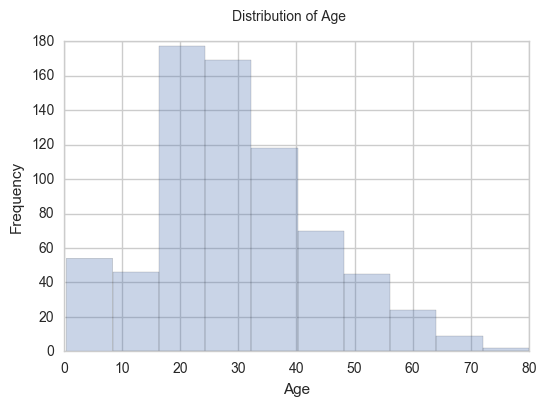

In [31]:
# Distribution of Age
import matplotlib
#matplotlib.style.use('ggplot')
fig = plt.figure()
titanic.Age.plot.hist(alpha=0.3,bins=10)
#titanic[titanic.Survived==0].Age.plot.hist(alpha=0.6,bins=10)
plt.suptitle('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
fig.savefig('AgeDistribution.png')

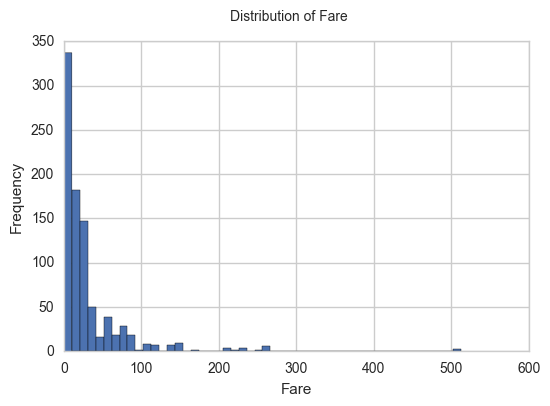

In [32]:
# Distribution of fare
#plt.style.use('seaborn-white')
fig = plt.figure()
plt.hist(titanic.Fare,bins=50)
plt.suptitle('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()
fig.savefig('FareDistribution.png')

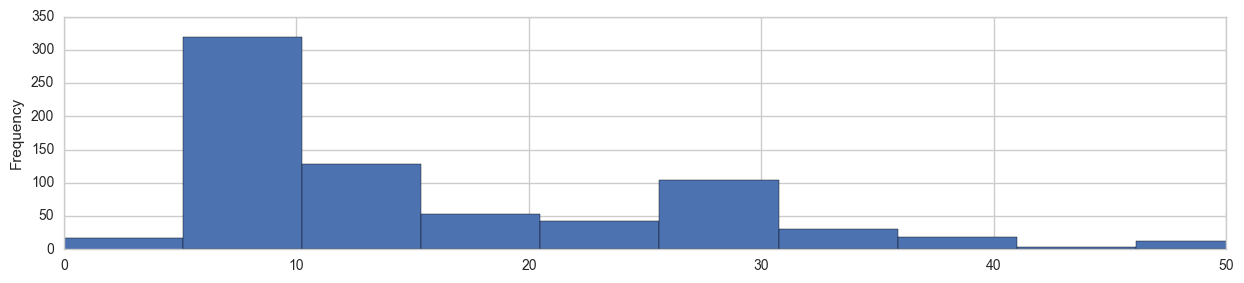

In [33]:
titanic['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

In [34]:
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Age', u'SibSp',
       u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Sex_female', u'Sex_male', u'Title_Master',
       u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')

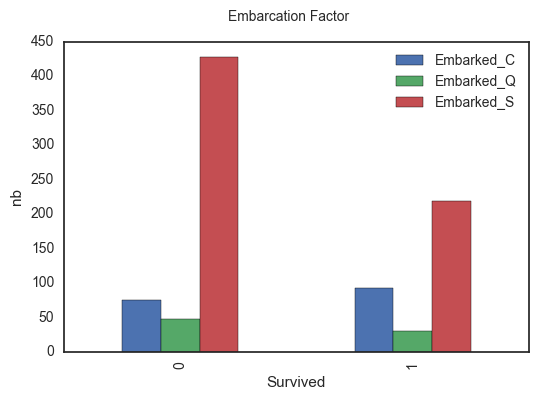

In [35]:
# Analysis with Group by survived
grouped_data = titanic.groupby('Survived')
df = grouped_data['Embarked_C','Embarked_Q','Embarked_S'].sum()
#df.plot(kind='bar')

plt.style.use('seaborn-white')
fig = plt.figure()
#plt.hist(df)
df.plot(kind='bar')
plt.suptitle('Embarcation Factor')
plt.xlabel('Survived')
plt.ylabel('nb')
plt.show()
plt.savefig('EmbarcationFactor.png')

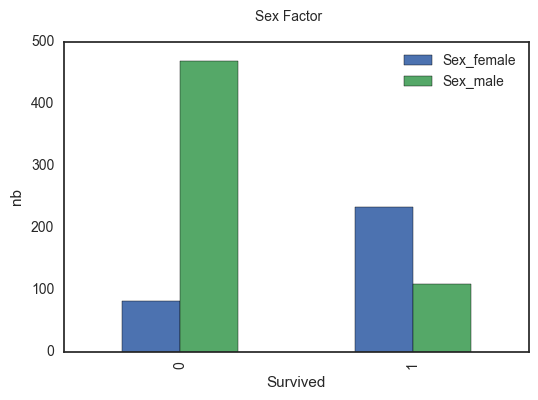

In [36]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['Sex_female','Sex_male'].sum()

plt.style.use('seaborn-white')
fig = plt.figure()
df.plot(kind='bar')
plt.suptitle('Sex Factor')
plt.xlabel('Survived')
plt.ylabel('nb')
plt.show()

plt.savefig('SexFactor.png')

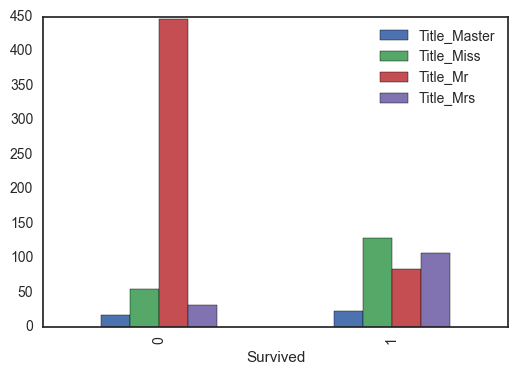

In [37]:
df = grouped_data['Title_Master','Title_Miss','Title_Mr','Title_Mrs'].sum()
df.plot(kind='bar')
plt.savefig('TitleFactor.png')

## 6. Relation between features

In [38]:
# Drop unused variables
# PassengerId is useless since it is redundant with titanic.index
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
print titanic.columns

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Sex_female', u'Sex_male',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')


In [39]:
corr = titanic.corr()
print corr

              Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived      1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass       -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age          -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp        -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch         0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare          0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
Embarked_C    0.168240 -0.243292  0.036261 -0.059528 -0.011069  0.269335   
Embarked_Q    0.003650  0.221009 -0.022405 -0.026354 -0.081228 -0.117216   
Embarked_S   -0.149683  0.074053 -0.023233  0.068734  0.060814 -0.162184   
Sex_female    0.543351 -0.131900 -0.093254  0.114631  0.245489  0.182333   
Sex_male     -0.543351  0.131900  0.093254 -0.114631 -0.245489 -0.182333   
Title_Master  0.085221  0.082081 -0.398827  0.349559  0.267344  0.010908   
Title_Miss  

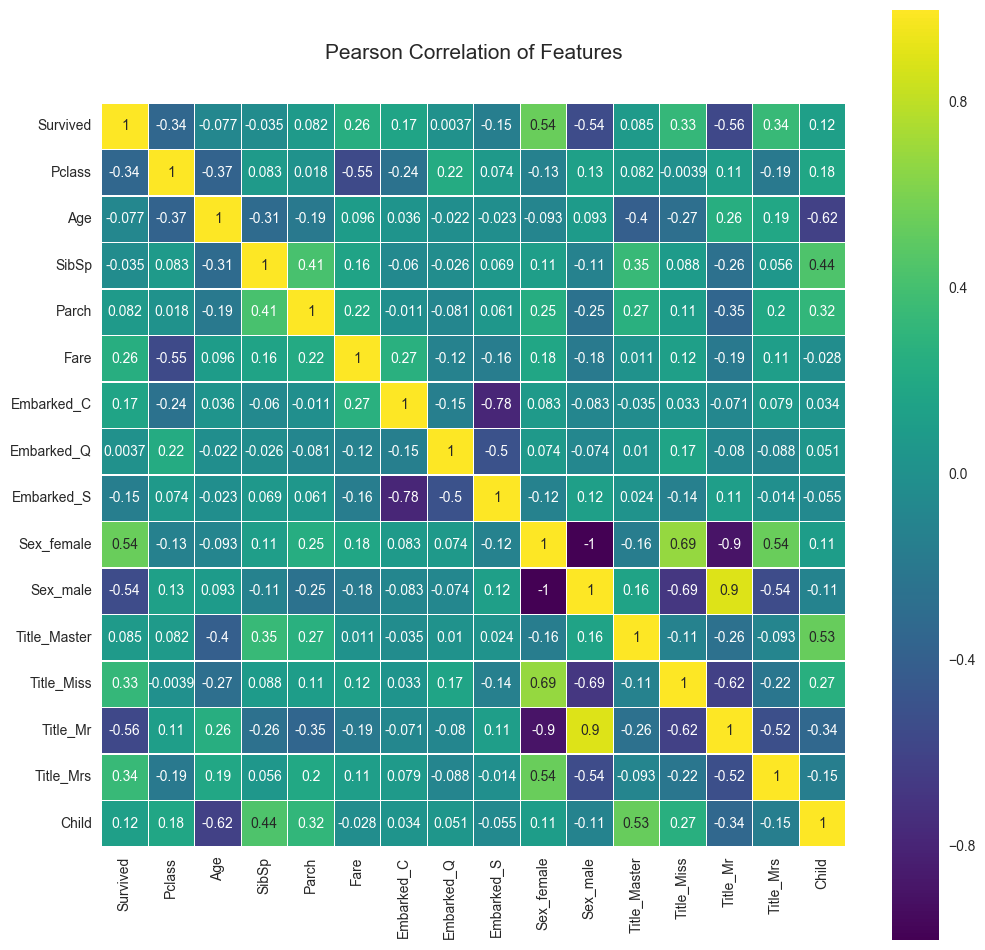

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('Pearson Correlation of Features.png')

Pclass and Fare are linked
Master and Age are inversely linked
SibSp and Parch are linked
Significant relation between survival and Sex 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


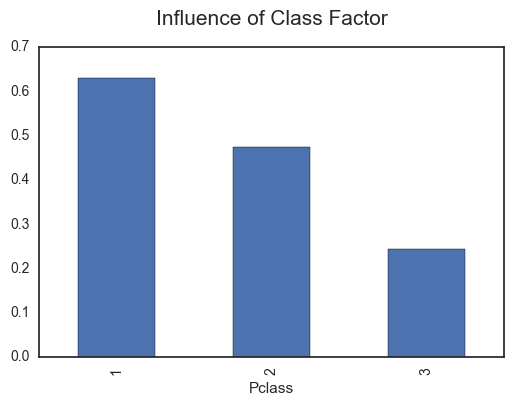

In [41]:
#Two step query to find sum of survived people, grouped by their passenger class (1 > 2 > 3)
group_survived = titanic.groupby(['Pclass'])
out_survived = group_survived['Survived'].mean()
plt.title('Influence of Class Factor', y=1.05, size=15)
df = out_survived
print df
df.plot(kind='bar')
plt.savefig('Class Factor.png')

In [42]:
# list of features
titanic.columns

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Sex_female', u'Sex_male',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')

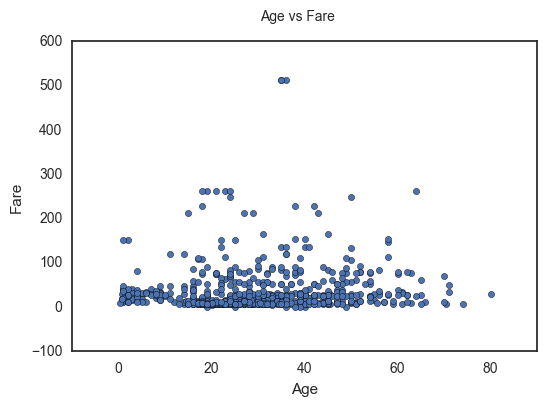

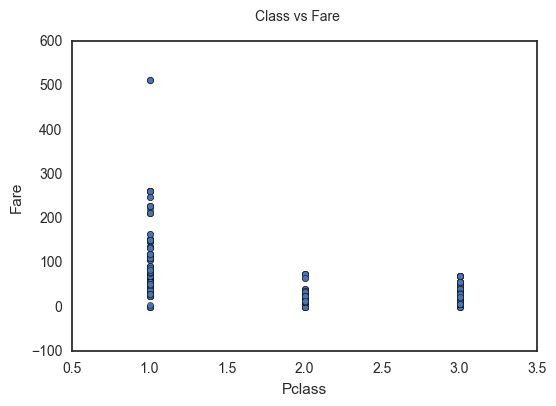

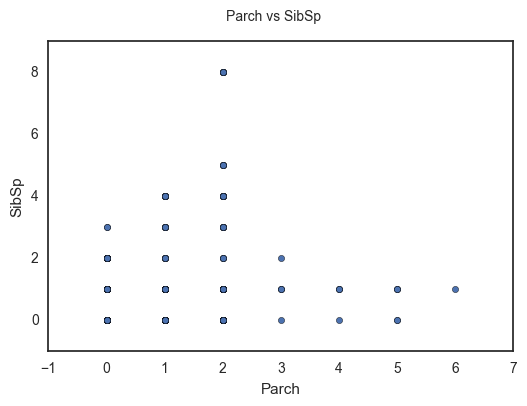

In [43]:
titanic.plot.scatter(x='Age',y='Fare')
plt.suptitle('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

titanic.plot.scatter(x='Pclass',y='Fare')
plt.suptitle('Class vs Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')

titanic.plot.scatter(x='Parch',y='SibSp')
plt.suptitle('Parch vs SibSp')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.show()

Strange. Does it depends on nb family size

In [44]:
print titanic.columns
df = titanic.dropna(axis=0)
#titanic.Age.fillna(titanic.Age.mean())
print df.shape
corr = df.corr()
print corr

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Sex_female', u'Sex_male',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')
(714, 16)
              Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived      1.000000 -0.359653 -0.077221 -0.017358  0.093317  0.268189   
Pclass       -0.359653  1.000000 -0.369226  0.067247  0.025683 -0.554182   
Age          -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp        -0.017358  0.067247 -0.308247  1.000000  0.383820  0.138329   
Parch         0.093317  0.025683 -0.189119  0.383820  1.000000  0.205119   
Fare          0.268189 -0.554182  0.096067  0.138329  0.205119  1.000000   
Embarked_C    0.193607 -0.276294  0.036261 -0.045462 -0.008846  0.299797   
Embarked_Q   -0.049549  0.132415 -0.022405  0.051619 -0.009126 -0.062765   
Embarked_S   -0.156815  0.194935 -0.023233  0.018126  0.012

In [45]:
# Let's play with pandas
# find the captain: Edward Smith
#titanic[titanic.Name.str.contains(u'Smith')]

In [46]:
# find the wealthiest person in board: John Jacob Astor IV -> we only have his wife (Madeleine Talmadge Force)
# actually he died and she survived
#titanic[titanic.Name.str.contains(u'Astor')]

In [47]:
# wealthy people:  Benjamin Guggenheim
#titanic[titanic.Name.str.contains(u'Guggenheim')]

In [48]:
# find the captain: Edward Smith or the Architect: Thomas Andrews. We got him!
# he travelled free!
# https://en.wikipedia.org/wiki/Thomas_Andrews: Age is 39 and full name is Thomas Andrews, Jr.
#titanic[titanic.Name.str.contains(u'Andrews')]

In [49]:
# who else travelled freely# 
# We detect the LINE type ticket among free tickets
titanic[titanic.Fare < 1]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child
179,0,3,36.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0.0
263,0,1,40.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0.0
271,1,3,25.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0.0
277,0,2,NaN,0,0,0.0,0,0,1,0,1,0,0,1,0,NaN
302,0,3,19.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0.0
413,0,2,NaN,0,0,0.0,0,0,1,0,1,0,0,1,0,NaN
466,0,2,NaN,0,0,0.0,0,0,1,0,1,0,0,1,0,NaN
481,0,2,NaN,0,0,0.0,0,0,1,0,1,0,0,1,0,NaN
597,0,3,49.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0.0
633,0,1,NaN,0,0,0.0,0,0,1,0,1,0,0,1,0,NaN


In [50]:
# Let's notice that White Star Line is the company name. And guess what? Maybe they are member of the crew
# Sad for most of them did not survived
#titanic[titanic.Ticket == 'LINE']

In [51]:
# split according to younger than 12 and above 12 -> ISSUE not working
# titanic.below12 = titanic[(titanic.Age <= 12) & (titanic.Age.notnull())]

In [52]:
# Care the fare is max but she was a maiden to Mrs Charlotte Cardeza. 
idx = titanic.Fare.argmax()
print titanic.iloc[idx]

Survived          1.0000
Pclass            1.0000
Age              35.0000
SibSp             0.0000
Parch             0.0000
Fare            512.3292
Embarked_C        1.0000
Embarked_Q        0.0000
Embarked_S        0.0000
Sex_female        1.0000
Sex_male          0.0000
Title_Master      0.0000
Title_Miss        1.0000
Title_Mr          0.0000
Title_Mrs         0.0000
Child             0.0000
Name: 258, dtype: float64


In [53]:
#titanic[titanic.Name.str.contains(u'Cardeza')]

In [54]:
# check the title Signore
#titanic[titanic.Name.str.contains(u'Sig.')]

In [55]:
# PassengerId is useless
#titanic.index

In [56]:
# Drop unused variables -> should be done when sure 
#titanic = titanic.drop(['PassengerId','Name','Ticket'], axis=1)

In [57]:
# children travelling alone (without parents)
titanic[(titanic.Child == 1) & (titanic.Parch == 0)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child
9,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,0,1,1.0
14,0,3,14.0,0,0,7.8542,0,0,1,1,0,0,1,0,0,1.0
22,1,3,15.0,0,0,8.0292,0,1,0,1,0,0,1,0,0,1.0
39,1,3,14.0,1,0,11.2417,1,0,0,1,0,0,1,0,0,1.0
84,1,2,17.0,0,0,10.5000,0,0,1,1,0,0,1,0,0,1.0
111,0,3,14.5,1,0,14.4542,1,0,0,1,0,0,1,0,0,1.0
114,0,3,17.0,0,0,14.4583,1,0,0,1,0,0,1,0,0,1.0
125,1,3,12.0,1,0,11.2417,1,0,0,0,1,1,0,0,0,1.0
138,0,3,16.0,0,0,9.2167,0,0,1,0,1,0,0,1,0,1.0
156,1,3,16.0,0,0,7.7333,0,1,0,1,0,0,1,0,0,1.0


In [58]:
# children travelling alone (without parents)
titanic[(titanic.Child == 1) & (titanic.Parch == 0)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child
9,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,0,1,1.0
14,0,3,14.0,0,0,7.8542,0,0,1,1,0,0,1,0,0,1.0
22,1,3,15.0,0,0,8.0292,0,1,0,1,0,0,1,0,0,1.0
39,1,3,14.0,1,0,11.2417,1,0,0,1,0,0,1,0,0,1.0
84,1,2,17.0,0,0,10.5000,0,0,1,1,0,0,1,0,0,1.0
111,0,3,14.5,1,0,14.4542,1,0,0,1,0,0,1,0,0,1.0
114,0,3,17.0,0,0,14.4583,1,0,0,1,0,0,1,0,0,1.0
125,1,3,12.0,1,0,11.2417,1,0,0,0,1,1,0,0,0,1.0
138,0,3,16.0,0,0,9.2167,0,0,1,0,1,0,0,1,0,1.0
156,1,3,16.0,0,0,7.7333,0,1,0,1,0,0,1,0,0,1.0
